In [2]:
import pandas as pd
# we need matplotlib library to visualize the dataset
import matplotlib.pyplot as plt

#### dataSet_link => https://www.kaggle.com/lislejoem/us-minimum-wage-by-state-from-1968-to-2017

In [23]:
df = pd.read_csv('data/Minimum-Wage-Data.csv', encoding='latin')

In [4]:
df.head(2)

,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,1968,Alabama,...,NaN,0.0,0.0,34.783333,0.00,0.00
1,1968,Alaska,2.10,NaN,2.1,2.1,34.783333,15.12,15.12


In [5]:
df.tail(2)

,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
2748,2017,Wisconsin,7.25,NaN,7.25,7.25,245.119583,7.41,7.41
2749,2017,Wyoming,5.15,NaN,5.15,5.15,245.119583,5.26,5.26


In [6]:
df.shape

(2750, 9)

In [7]:
# we will group by column
group_by = df.groupby('State')
group_by.get_group('Alabama').set_index('Year').head()

,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
Year,,,,,,,,
1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
1969,Alabama,...,NaN,0.0,0.0,36.683333,0.0,0.0
1970,Alabama,...,NaN,0.0,0.0,38.825000,0.0,0.0
1971,Alabama,...,NaN,0.0,0.0,40.491667,0.0,0.0
1972,Alabama,...,NaN,0.0,0.0,41.816667,0.0,0.0


In [8]:
act_min_wage = pd.DataFrame()
for name, group in df.groupby('State'):
    if act_min_wage.empty:
        act_min_wage = group.set_index('Year')[['Low.2018']].rename(columns={'Low.2018': name})
    else:
        act_min_wage = act_min_wage.join(group.set_index('Year')[['Low.2018']].rename(columns={'Low.2018': name}))

act_min_wage.head(3)

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,...,0.0,0.0,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,...,0.0,0.0,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,...,0.0,0.0,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38


In [9]:
act_min_wage.describe()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.0,50.000000,39.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.0,9.583800,2.316200,6.781600,8.632800,6.389800,8.823600,7.498800,8.343200,7.773200,...,0.0,5.541200,6.643590,6.836600,8.657400,5.897400,8.301800,7.166400,7.694200,5.149200
std,0.0,1.845176,3.474504,1.341223,1.187508,1.521052,1.023613,1.265436,1.476133,0.887354,...,0.0,2.202229,1.590176,0.819367,0.984647,2.726151,1.868613,0.793673,0.762675,1.998928
min,0.0,7.380000,0.000000,1.070000,6.420000,3.840000,6.820000,4.410000,5.510000,6.220000,...,0.0,0.000000,4.390000,4.790000,6.800000,0.000000,4.410000,5.580000,6.420000,2.260000
25%,0.0,8.252500,0.000000,6.522500,7.695000,5.072500,7.865000,7.015000,7.097500,7.172500,...,0.0,4.762500,5.105000,6.317500,7.800000,5.892500,7.227500,6.630000,7.107500,3.270000
50%,0.0,8.890000,0.000000,6.920000,8.670000,6.375000,9.075000,7.845000,8.510000,7.655000,...,0.0,6.070000,6.770000,6.930000,8.885000,6.855000,9.055000,7.075000,7.580000,5.445000
75%,0.0,10.492500,3.147500,7.290000,9.307500,7.677500,9.455000,8.327500,9.140000,8.242500,...,0.0,7.105000,7.830000,7.470000,9.372500,7.620000,9.672500,7.612500,8.145000,6.607500
max,0.0,15.120000,10.220000,8.680000,11.880000,9.500000,11.080000,9.580000,12.000000,10.010000,...,0.0,8.380000,10.010000,8.330000,10.320000,8.800000,11.520000,9.130000,9.660000,8.980000


In [10]:
# to find the corelation between the column
act_min_wage.corr().head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,NaN,1.000000,0.018638,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,...,NaN,-0.522472,0.277016,-0.020462,0.663558,-0.601640,0.411593,0.044814,0.702570,0.727932
Arizona,NaN,0.018638,1.000000,0.089395,0.498994,0.742527,0.458163,0.429836,0.590848,-0.049914,...,NaN,0.369900,-0.758607,0.439344,0.517960,0.047405,0.587975,0.584596,0.131588,0.346528
Arkansas,NaN,-0.377934,0.089395,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,...,NaN,0.503242,-0.204485,0.194680,0.087429,0.582192,-0.072343,0.420819,0.000470,-0.250592
California,NaN,0.717653,0.498994,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,...,NaN,-0.239533,-0.417782,0.392898,0.877922,-0.326364,0.754085,0.371765,0.584067,0.722617


In [11]:
issue_df = df[df['Low.2018'] == 0]
issue_df.head()

,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
10,1968,Florida,...,NaN,0.0,0.0,34.783333,0.0,0.0
11,1968,Georgia,...,NaN,0.0,0.0,34.783333,0.0,0.0
15,1968,Illinois,...,NaN,0.0,0.0,34.783333,0.0,0.0
17,1968,Iowa,...,NaN,0.0,0.0,34.783333,0.0,0.0


In [12]:
issue_df['State'].unique()

array(['Alabama', 'Florida', 'Georgia', 'Illinois', 'Iowa', 'Kansas',
       'Louisiana', 'Mississippi', 'Missouri', 'Montana',
       'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'Arizona'],
      dtype=object)

In [13]:
import numpy as np

In [14]:
# replacing 0 with NaN and then dope all the column with NaN
act_min_wage.replace(0, np.NaN).dropna(axis=1).corr().head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,...,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,...,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,...,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,...,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,...,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971


In [15]:
min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()
for problem in issue_df['State'].unique():
    if problem in min_wage_corr.columns:
        print('somethig is wrong')

In [16]:
grouped_issue = issue_df.groupby('State')

grouped_issue.get_group('Alabama').head()

,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
55,1969,Alabama,...,NaN,0.0,0.0,36.683333,0.0,0.0
110,1970,Alabama,...,NaN,0.0,0.0,38.825000,0.0,0.0
165,1971,Alabama,...,NaN,0.0,0.0,40.491667,0.0,0.0
220,1972,Alabama,...,NaN,0.0,0.0,41.816667,0.0,0.0


In [17]:
# just to make sure that there is no non zero value in the columns
grouped_issue.get_group('Alabama')['Low.2018'].sum()

0.0

In [18]:
for state, data in issue_df.groupby('State'):
    if data['Low.2018'].sum() != 0.0:
        print('somethig is wrong ove here')
        

## Visualizing correlatoin table

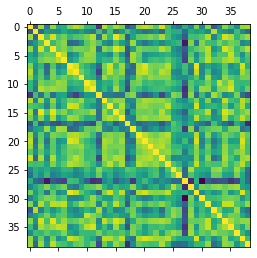

In [19]:
plt.matshow(min_wage_corr)

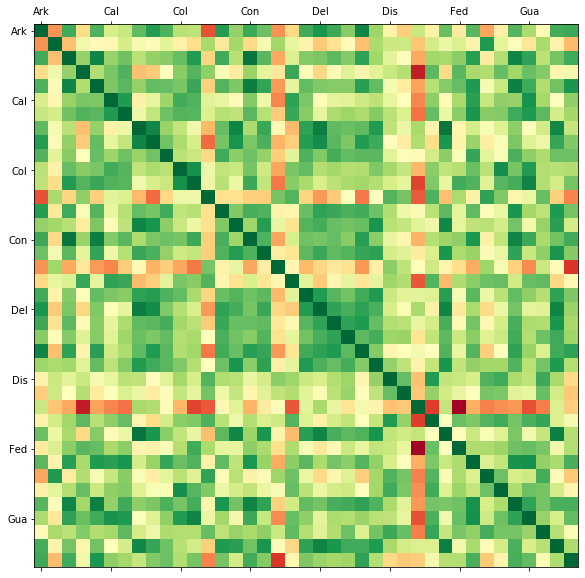

In [20]:
labels = [c[0:3] for c in min_wage_corr.columns]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)

In [21]:
df.head()

,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


In [22]:
test_df = df[ df['State'] == 'Alabama']
o_df = pd.DataFrame(test_df)
for t in o_df[['State']]:
    print([o_df[t]])

[0       Alabama
55      Alabama
110     Alabama
165     Alabama
220     Alabama
275     Alabama
330     Alabama
385     Alabama
440     Alabama
495     Alabama
550     Alabama
605     Alabama
660     Alabama
715     Alabama
770     Alabama
825     Alabama
880     Alabama
935     Alabama
990     Alabama
1045    Alabama
1100    Alabama
1155    Alabama
1210    Alabama
1265    Alabama
1320    Alabama
1375    Alabama
1430    Alabama
1485    Alabama
1540    Alabama
1595    Alabama
1650    Alabama
1705    Alabama
1760    Alabama
1815    Alabama
1870    Alabama
1925    Alabama
1980    Alabama
2035    Alabama
2090    Alabama
2145    Alabama
2200    Alabama
2255    Alabama
2310    Alabama
2365    Alabama
2420    Alabama
2475    Alabama
2530    Alabama
2585    Alabama
2640    Alabama
2695    Alabama
Name: State, dtype: object]
